<a href="https://colab.research.google.com/github/JinnnnyHong/machine-learning_math-/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### url불러오고, csv읽어서 df에 저장

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/JinnnnyHong/machine-learning_math-/main/diabetes_prediction_dataset.csv'
df = pd.read_csv(url, sep = ',')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


### null 개수 확인

In [ ]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

### 성별과 흡연 경력 처리

In [ ]:
#흡연 경력 처리
smoking_mapping = {
    'never': 'absoluteness',
    'No Info': 'not current',
    'former': 'before',
    'current': 'present',
    'not current': 'not present',
    'ever': 'always'
}
df['smoking_history'] = df['smoking_history'].map(smoking_mapping)
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)


#성명 원-핫 인코더 처리
df['gender'] = df['gender'].replace('Female', 'Other')
df = pd.get_dummies(df, columns=['gender'], drop_first=True)


df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_always,smoking_history_before,smoking_history_not current,smoking_history_not present,smoking_history_present,gender_Other
0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,0,1
1,54.0,0,0,27.32,6.6,80,0,0,0,1,0,0,1
2,28.0,0,0,27.32,5.7,158,0,0,0,0,0,0,0
3,36.0,0,0,23.45,5.0,155,0,0,0,0,0,1,1
4,76.0,1,1,20.14,4.8,155,0,0,0,0,0,1,0


### EDA 진행

In [ ]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_always,smoking_history_before,smoking_history_not current,smoking_history_not present,smoking_history_present,gender_Other
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000,0.040040,0.093520,0.358160,0.06447,0.092860,0.585700
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883,0.196054,0.291161,0.479462,0.24559,0.290238,0.492603
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


### train ser, test set 나눈 후 
1. 기본 신경망 모델
2.  변형된 신경망 모델
3. Batch Normalization 모델
 만들어 모델 성능 비교 진행

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Feature와 Target 데이터 분리
X = df.drop(columns=['diabetes'])
y = df['diabetes']

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 기본 신경망 모델
model_base = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)
model_base.fit(X_train, y_train)

# 변형된 신경망 모델
model_modified = MLPClassifier(hidden_layer_sizes=(10, 5), activation='tanh', random_state=42)
model_modified.fit(X_train, y_train)

# Batch Normalization을 적용한 신경망 모델
model_bn = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(hidden_layer_sizes=(10,), activation='relu', random_state=42))
])
model_bn.fit(X_train, y_train)

# 모델 성능 비교
y_pred_base = model_base.predict(X_test)
y_pred_modified = model_modified.predict(X_test)
y_pred_bn = model_bn.predict(X_test)

accuracy_base = accuracy_score(y_test, y_pred_base)
accuracy_modified = accuracy_score(y_test, y_pred_modified)
accuracy_bn = accuracy_score(y_test, y_pred_bn)

print('기본 신경망 모델 정확도:', accuracy_base)
print('변형된 신경망 모델 정확도:', accuracy_modified)
print('Batch Normalization 적용한 신경망 모델 정확도:', accuracy_bn)


기본 신경망 모델 정확도: 0.96695
변형된 신경망 모델 정확도: 0.97145
Batch Normalization 적용한 신경망 모델 정확도: 0.96715


### Loss 그래프 그리기

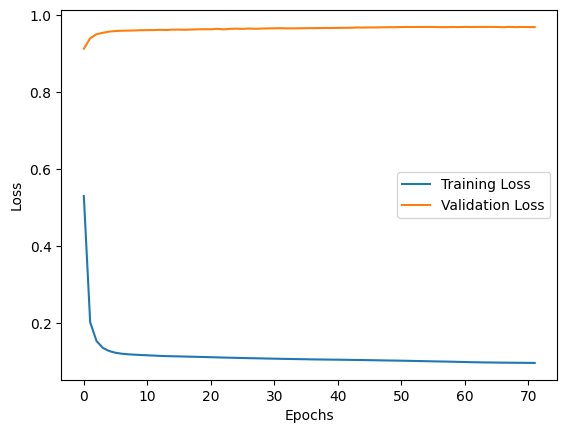

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 신경망 모델 학습 및 Early Stopping 적용
model = MLPClassifier(hidden_layer_sizes=(10,), random_state=42, early_stopping=True, validation_fraction=0.2)
model.fit(X_train, y_train)

# 학습 과정에서의 Loss 값 확인
train_loss = model.loss_curve_
val_loss = model.validation_scores_

# Loss 그래프 그리기
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### K-fold cross validation 수행

In [ ]:
from sklearn.model_selection import cross_val_score

# K-fold Cross Validation 수행
model = MLPClassifier(hidden_layer_sizes=(10,), random_state=42)
scores = cross_val_score(model, X_scaled, y, cv=5)
mean_accuracy = scores.mean()
print('Mean Accuracy:', mean_accuracy)


Mean Accuracy: 0.9683900000000001
